<a href="https://colab.research.google.com/github/Gopal-21/Sales-Analysis-using-Python/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Please do the data analysis as per the requirement mentioned below:**


*   What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?






In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

** Total of 12 files need to be added and merged as a single data frame. **

In [4]:
Data = pd.DataFrame() # Created a empty data frame
files = [file for file in os.listdir('/Data Analysis')] ## created a list, which is taking all the files from data analysis folder and storing into it.
for file in files:
    df=pd.read_csv('/Data Analysis/'+file)
    Data=pd.concat([Data,df]) # creating merged df by iterating over all the files using for loop and then using concat
#Data.head(10)
#Data.info()
#Data.describe()

Data.to_csv('Final_data.csv',index=False) # storing the data into a csv file

Final_data=pd.read_csv('Final_data.csv')
Final_data.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


### **Data Cleaning**


In [5]:
Final_data.isna().sum() # checking for null values
Final_data.dropna(inplace=True) # dropping the null
Final_data.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [6]:
Final_data.duplicated().sum() # checking for duplicates (total 618 rows)
Final_data.drop_duplicates(inplace=True) # dropping the duplicates
Final_data.duplicated().sum()


0

## Change the Data type

In [7]:

Final_data.info() #all are having object type
#

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
#Final_data['Order ID'] = Final_data['Order ID'].astype('string')
#Final_data['Quantity Ordered'] = pd.to_numeric(Final_data['Quantity Ordered'])
#Final_data['Price Each'] = pd.to_numeric(Final_data['Price Each'])
#Final_data['Order Date'] = Final_data['Order Date'].astype('datetime64[ns]')
#Final_data['Purchase Address'] = Final_data['Purchase Address'].astype('string')
#Final_data['Quantity Ordered'] = pd.to_numeric(Final_data['Quantity Ordered'])
#Final_data['Price Each'] = pd.to_numeric(Final_data['Price Each'])
#print(Final_data['Quantity Ordered'].unique())
#print(Final_data['Price Each'].unique())
#print(Final_data['Order Date'].unique())
#print(Final_data['Purchase Address'].unique())
print(Final_data['Quantity Ordered'].unique())

['1' '5' '2' '3' '4' 'Quantity Ordered' '6' '7' '8' '9']


## There is some issue with the data as it is having unwanted values like 'Quantity Ordered' these are basically header row when we merge all the files, lets clean then

In [8]:
header_row = Final_data[Final_data['Quantity Ordered'] == 'Quantity Ordered']
print(header_row)

     Order ID  Product  Quantity Ordered  Price Each  Order Date  \
775  Order ID  Product  Quantity Ordered  Price Each  Order Date   

     Purchase Address  
775  Purchase Address  


In [9]:
if not header_row.empty:
  Final_data = Final_data.drop(header_row.index)
Final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [10]:
header_row = Final_data[Final_data['Quantity Ordered'] == 'Quantity Ordered']
print(header_row)

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []


# **Let's Change the Data Type**

In [11]:
Final_data['Quantity Ordered'] = pd.to_numeric(Final_data['Quantity Ordered'])
Final_data['Price Each'] = pd.to_numeric(Final_data['Price Each'])

In [12]:
Final_data['Order Date'] = Final_data['Order Date'].astype('datetime64[ns]')
Final_data['Purchase Address'] = Final_data['Purchase Address'].astype('string')
Final_data['Quantity Ordered'] = pd.to_numeric(Final_data['Quantity Ordered'])
Final_data['Product'] = Final_data['Product'].astype('string')
Final_data.info()

<ipython-input-12-2347d3c39c1d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Final_data['Order Date'] = Final_data['Order Date'].astype('datetime64[ns]')


<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  string        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), string(2)
memory usage: 9.9+ MB


In [13]:
Final_data['Month'] = Final_data['Order Date'].dt.month # we need month to calculate sales month wise
Final_data['Sales'] = Final_data['Quantity Ordered'] * Final_data['Price Each'] # creating a new column sales
Final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95


## REQ 1- What was the best month for sales? How much was earned that month?

In [14]:
Value = Final_data.groupby('Month').sum(numeric_only=True)
Value

,Quantity Ordered,Price Each,Sales
Month,,,
1,10893,1810924.81,1821413.16
2,13431,2186940.38,2200078.08
3,16979,2789084.64,2804973.35
4,20536,3366218.76,3389217.98
5,18653,3133134.61,3150616.23
6,15234,2560503.50,2576280.15
7,16054,2631225.12,2646461.32
8,13429,2226963.90,2241083.37
9,13091,2081897.65,2094465.69


range(1, 13)


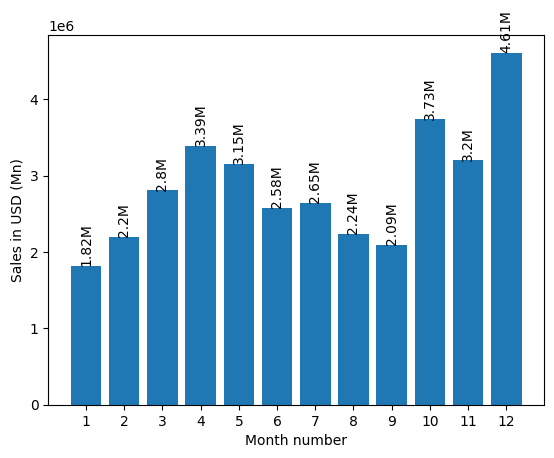

In [15]:
months = range(1,13)
print(months)

plt.bar(months,Value['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD (Mn)')
plt.xlabel('Month number')
# Add labels to the bars
for i, v in enumerate(Value['Sales']):
  plt.text(i + 1, v, str(round(v / 1000000, 2)) + 'M', ha='center', va='bottom', rotation = 90)

plt.show()

### The Best month for Sales is **DECEMBER** with **4.61 Million**

## REQ 2 - What city sold the most product?

In [16]:
# we need to create the city column from the state, as we dont have direct city column to use in visualization
def get_city(address):
  return address.split(',')[1].strip(" ")

def get_state(address):
  return address.split(',')[2].split(' ')[1]

Final_data['City'] = Final_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ,{get_state(x)}")
Final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,"Atlanta ,GA"
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,"Seattle ,WA"
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,"Atlanta ,GA"
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,"Atlanta ,GA"
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,"Seattle ,WA"


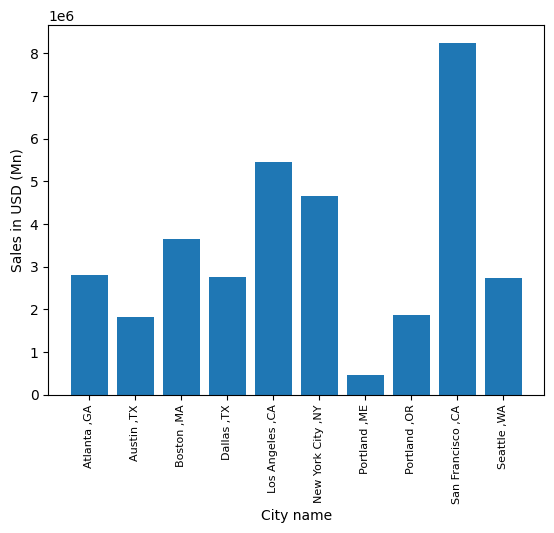

In [17]:
#Creating a Bar chart
Value = Final_data.groupby('City').sum(numeric_only=True)
Value
cities = [city for city, df in Final_data.groupby('City')]
plt.bar(cities,Value['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD (Mn)')
plt.xlabel('City name')
plt.show()

## **San Francisco ,CA** sold the most product

## REQ-3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [18]:
# Need to add column for min and hour to specify at what time we can maximize the buying by displaying ad

Final_data['Hour'] = pd.to_datetime(Final_data['Order Date']).dt.hour
Final_data['Minute'] = pd.to_datetime(Final_data['Order Date']).dt.minute
Final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,"Atlanta ,GA",16,51
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,"Seattle ,WA",8,55
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,"Atlanta ,GA",12,41
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,"Atlanta ,GA",10,15
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,"Seattle ,WA",2,13


In [22]:
# Need to group by using Hour and take the total count of orders
Value = Final_data.groupby(['Hour'])['Order Date'].count()
Value.head()

,Order Date
Hour,
0,3902
1,2347
2,1242
3,830
4,852


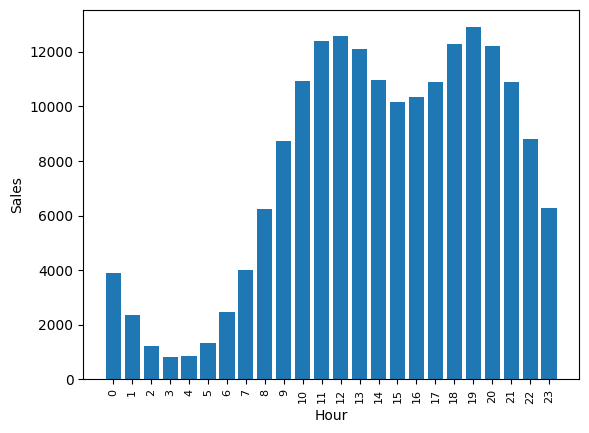

In [22]:
#Creating a Bar chart
Value = Final_data.groupby(['Hour'])['Order Date'].count()
Value
cities = [city for city, df in Final_data.groupby('Hour')]
plt.bar(cities,Value)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales')
plt.xlabel('Hour')
plt.show()

## Best time to display the Ads is between **11 AM to 10 PM**.

## REQ-4 What products are most often sold together?


In [29]:
#getting the pair of products which are ordered together
df = Final_data[Final_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

#need to iterate over all rows of df to check for maximum pair of products order together

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']: #iterating and storing them in pair of 3
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # checking for pair of 2
#print(count)
#print.most_common
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


<ipython-input-29-7ca43a832d14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


## Products which are sold most as pair are **'iPhone', 'Lightning Charging Cable'**.

## REQ- 5 What product sold the most?

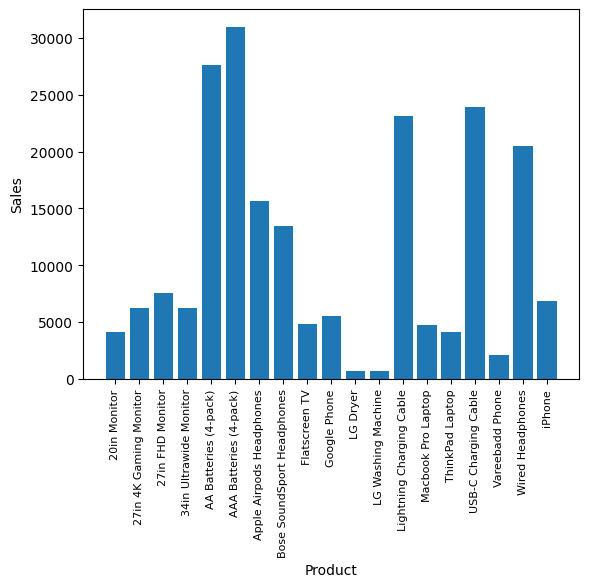

In [31]:
# we need to group by using product, to find the product which sold most
Value = Final_data.groupby('Product').sum(numeric_only=True)
quantity = Value['Quantity Ordered']
product = Value.index
plt.bar(product,quantity)
plt.xticks(product, rotation='vertical', size=8)
plt.ylabel('Sales')
plt.xlabel('Product')
plt.show()


## **AAA Batteries** sold most